In [1]:
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import seaborn as sns

In [4]:
df=pd.read_csv("DT2.csv")

In [5]:
df=df.drop(columns="Unnamed: 0")

In [6]:
df

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0         553.0             8.0             166.0         0.644172   
1         553.0             7.0             245.0         0.616667   
2         553.0            11.0             195.0         0.637838   
3         553.0            12.0             245.0         0.632911   
4         553.0             8.0             178.0         0.656051   
...         ...             ...               ...              ...   
4083        9.0            11.0             575.0         0.530466   
4084        9.0             9.0             904.0         0.472158   
4085        9.0            11.0            1122.0         0.439421   
4086        9.0            12.0             429.0         0.514925   
4087        9.0            12.0             491.0         0.454167   

      n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0                  1.0                  0.838384        5.0             1.0   
1                  1.0                  0.762821        8.0             5.0   
2                  1.0                  0.785124        6.0             4.0   
3                  1.0                  0.771242        8.0             5.0   
4                  1.0                  0.797980        7.0             5.0   
...                ...                       ...        ...             ...   
4083               1.0                  0.681440        8.0             5.0   
4084               1.0                  0.606822       27.0             2.0   
4085               1.0                  0.635258        4.0             1.0   
4086               1.0                  0.658436        3.0             3.0   
4087               1.0                  0.609665        2.0             2.0   

      num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0          0.0         0.0  ...               0.100000                   0.50   
1          1.0         0.0  ...               0.100000                   0.50   
2          1.0         0.0  ...               0.136364                   1.00   
3          0.0         0.0  ...               0.033333                   0.60   
4          1.0         0.0  ...               0.033333                   0.50   
...        ...         ...  ...                    ...                    ...   
4083       1.0         0.0  ...               0.033333                   0.70   
4084       2.0         0.0  ...               0.100000                   0.60   
4085       6.0         0.0  ...               0.100000                   1.00   
4086       3.0         0.0  ...               0.166667                   0.75   
4087       2.0         1.0  ...               0.062500                   0.90   

      avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0                  0.000000               0.000000               0.000000   
1                 -0.341667              -0.500000              -0.125000   
2                  0.000000               0.000000               0.000000   
3                 -0.108631              -0.166667              -0.071429   
4                 -0.095833              -0.133333              -0.050000   
...                     ...                    ...                    ...   
4083              -0.343519              -1.000000              -0.100000   
4084              -0.225694              -0.500000              -0.050000   
4085              -0.262500              -1.000000              -0.100000   
4086              -0.179847              -0.312500              -0.025000   
4087              -0.164881              -0.333333              -0.050000   

      title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0               0.000000                  0.000000                0.500000   
1               0.000000                  0.000000                0.500000   
2               0.625000                  0.175000                0.125000   
3     

In [7]:
bins_shares = [0, 1000, 2000, 5000, np.inf]
# Discretize the shares column and create a new categorical column
df['shares_cat'] = pd.cut(df['shares'], bins=bins_shares, labels=['Low Engagement', 'Moderate Engagement', 'High Engagement', 'Viral'])

In [8]:
df.drop(columns="shares", inplace=True)

In [9]:
df.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      553.0             8.0             166.0         0.644172   
1      553.0             7.0             245.0         0.616667   
2      553.0            11.0             195.0         0.637838   
3      553.0            12.0             245.0         0.632911   
4      553.0             8.0             178.0         0.656051   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.838384        5.0             1.0   
1               1.0                  0.762821        8.0             5.0   
2               1.0                  0.785124        6.0             4.0   
3               1.0                  0.771242        8.0             5.0   
4               1.0                  0.797980        7.0             5.0   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       0.0         0.0  ...               0.100000                    0.5   
1       1.0         0.0  ...               0.100000                    0.5   
2       1.0         0.0  ...               0.136364                    1.0   
3       0.0         0.0  ...               0.033333                    0.6   
4       1.0         0.0  ...               0.033333                    0.5   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0               0.000000               0.000000               0.000000   
1              -0.341667              -0.500000              -0.125000   
2               0.000000               0.000000               0.000000   
3              -0.108631              -0.166667              -0.071429   
4              -0.095833              -0.133333              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0               0.000                     0.000                   0.500   
1               0.000                     0.000                   0.500   
2               0.625                     0.175                   0.125   
3               0.600                     0.200                   0.100   
4               0.000                     0.000                   0.500   

   abs_title_sentiment_polarity           shares_cat  
0                         0.000      High Engagement  
1                         0.000       Low Engagement  
2                         0.175       Low Engagement  
3                         0.200  Moderate Engagement  
4                         0.000  Moderate Engagement  

[5 rows x 46 columns]

In [8]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset

y=df.shares_cat
X= df.drop(columns='shares_cat')

# Create a decision tree classifier
clf = DecisionTreeClassifier()


# Create a recursive feature eliminator and fit it to the data
rfe = RFE(estimator=clf, n_features_to_select=10)
rfe.fit(X, y)

# Print the rankings of the features
for i in range(X.shape[1]):
    print(f"Feature {i+1}: {rfe.ranking_[i]}")

Feature 1: 1
Feature 2: 20
Feature 3: 6
Feature 4: 9
Feature 5: 34
Feature 6: 1
Feature 7: 12
Feature 8: 31
Feature 9: 19
Feature 10: 33
Feature 11: 1
Feature 12: 32
Feature 13: 35
Feature 14: 13
Feature 15: 1
Feature 16: 23
Feature 17: 36
Feature 18: 5
Feature 19: 18
Feature 20: 1
Feature 21: 1
Feature 22: 15
Feature 23: 16
Feature 24: 1
Feature 25: 8
Feature 26: 10
Feature 27: 2
Feature 28: 7
Feature 29: 4
Feature 30: 11
Feature 31: 1
Feature 32: 1
Feature 33: 17
Feature 34: 14
Feature 35: 25
Feature 36: 1
Feature 37: 22
Feature 38: 29
Feature 39: 3
Feature 40: 26
Feature 41: 28
Feature 42: 21
Feature 43: 24
Feature 44: 27
Feature 45: 30


In [9]:
ranks=list(rfe.ranking_)

In [10]:
col=list(X.columns)

In [11]:
col_ranks=dict(zip(col, ranks))

In [12]:
col_ranks

{'timedelta': 1,
 'n_tokens_title': 20,
 'n_tokens_content': 6,
 'n_unique_tokens': 9,
 'n_non_stop_words': 34,
 'n_non_stop_unique_tokens': 1,
 'num_hrefs': 12,
 'num_self_hrefs': 31,
 'num_imgs': 19,
 'num_videos': 33,
 'average_token_length': 1,
 'num_keywords': 32,
 'kw_min_min': 35,
 'kw_max_min': 13,
 'kw_avg_min': 1,
 'kw_min_max': 23,
 'kw_max_max': 36,
 'kw_avg_max': 5,
 'kw_min_avg': 18,
 'kw_max_avg': 1,
 'kw_avg_avg': 1,
 'self_reference_min_shares': 15,
 'self_reference_max_shares': 16,
 'self_reference_avg_sharess': 1,
 'LDA_00': 8,
 'LDA_01': 10,
 'LDA_02': 2,
 'LDA_03': 7,
 'LDA_04': 4,
 'global_subjectivity': 11,
 'global_sentiment_polarity': 1,
 'global_rate_positive_words': 1,
 'global_rate_negative_words': 17,
 'rate_positive_words': 14,
 'rate_negative_words': 25,
 'avg_positive_polarity': 1,
 'min_positive_polarity': 22,
 'max_positive_polarity': 29,
 'avg_negative_polarity': 3,
 'min_negative_polarity': 26,
 'max_negative_polarity': 28,
 'title_subjectivity': 21,

In [13]:
imp_cols = [col for col, value in col_ranks.items() if value==1]

In [14]:
imp_cols

['timedelta',
 'n_non_stop_unique_tokens',
 'average_token_length',
 'kw_avg_min',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'avg_positive_polarity']

In [10]:
model_df=df[['n_non_stop_unique_tokens','kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'LDA_00', 'LDA_01', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words', 'shares_cat']]

In [2]:
import pandas as pd
scl_df=pd.read_csv("DT.csv")

In [3]:
scl_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
scl_df

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      1.121864       -1.000000         -0.756303         1.046189   
1      1.121864       -1.333333         -0.535014         0.775975   
2      1.121864        0.000000         -0.675070         0.983963   
3      1.121864        0.333333         -0.535014         0.935565   
4      1.121864       -1.000000         -0.722689         1.162891   
...         ...             ...               ...              ...   
4083  -0.827957        0.000000          0.389356        -0.070870   
4084  -0.827957       -0.666667          1.310924        -0.643696   
4085  -0.827957        0.000000          1.921569        -0.965303   
4086  -0.827957        0.333333         -0.019608        -0.223542   
4087  -0.827957        0.333333          0.154062        -0.820443   

      n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0            -2.102330                  1.366624       -0.4       -0.666667   
1            -0.855792                  0.625721        0.2        0.666667   
2            -1.481932                  0.844408       -0.2        0.333333   
3            -0.898345                  0.708293        0.2        0.666667   
4            -2.102330                  0.970460        0.0        0.666667   
...                ...                       ...        ...             ...   
4083          0.373522                 -0.172215        0.2        0.666667   
4084          0.702803                 -0.903851        4.0       -0.333333   
4085          0.795677                 -0.625033       -0.6       -0.666667   
4086         -0.080716                 -0.397773       -0.8        0.000000   
4087          0.053698                 -0.875973       -1.0       -0.333333   

      num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0         -1.0         0.0  ...               0.000000                 -0.625   
1          0.0         0.0  ...               0.000000                 -0.625   
2          0.0         0.0  ...               0.727273                  0.625   
3         -1.0         0.0  ...              -1.333333                 -0.375   
4          0.0         0.0  ...              -1.333333                 -0.625   
...        ...         ...  ...                    ...                    ...   
4083       0.0         0.0  ...              -1.333333                 -0.125   
4084       1.0         0.0  ...               0.000000                 -0.375   
4085       5.0         0.0  ...               0.000000                  0.625   
4086       2.0         0.0  ...               1.333333                  0.000   
4087       1.0         1.0  ...              -0.750000                  0.375   

      avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0                  2.025342               1.250000               1.333333   
1                 -0.967055               0.000000              -0.333333   
2                  2.025342               1.250000               1.333333   
3                  1.073927               0.833333               0.380952   
4                  1.186011               0.916667               0.666667   
...                     ...                    ...                    ...   
4083              -0.983274              -1.250000               0.000000   
4084               0.048657               0.000000               0.666667   
4085              -0.273695              -1.250000               0.000000   
4086               0.450200               0.468750               1.000000   
4087               0.581276               0.416667               0.666667   

      title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0               0.000000                  0.000000                0.000000   
1               0.000000                  0.000000                0.000000   
2               1.875000                  0.175000               -1.298077   
3     

In [5]:
model_df2=scl_df[['n_non_stop_unique_tokens','kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'LDA_00', 'LDA_01', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words','shares']]

In [6]:
model_df2

n_non_stop_unique_tokens  kw_avg_min  kw_avg_max  kw_max_avg    LDA_00  \
0                     1.366624    0.490143   -0.750135   -0.418799 -0.026919   
1                     0.625721   -0.153802   -0.219521   -0.281040  0.679712   
2                     0.844408    1.167808   -0.327931    2.716802  1.136116   
3                     0.708293    1.451001   -0.451329    1.100688 -0.027083   
4                     0.970460   -0.188880    0.018616    0.019275  0.114127   
...                        ...         ...         ...         ...       ...   
4083                 -0.172215    0.197312    0.523815    0.145494  1.745901   
4084                 -0.903851    0.835793    0.062763   -0.337117  2.383808   
4085                 -0.625033    0.554047   -0.328458   -0.337117  0.587275   
4086                 -0.397773    2.323220   -0.098669    2.263025 -0.027091   
4087                 -0.875973    0.816905   -0.495511   -0.337117  0.433187   

         LDA_01  global_subjectivity  global_sentiment_polarity  \
0      0.001586             1.116417                   0.591745   
1     16.221156             0.465824                  -0.401787   
2     -0.477811             1.801612                   1.593156   
3      0.019039            -1.093751                  -0.137783   
4      1.241856            -0.886389                  -0.362595   
...         ...                  ...                        ...   
4083  -0.000303             0.804798                  -0.438894   
4084  -0.000472            -0.531490                  -1.038855   
4085  -0.360476            -0.417178                  -0.243273   
4086   8.135960            -0.030426                   0.615325   
4087  -0.483751            -0.025294                   0.002605   

      global_rate_positive_words  global_rate_negative_words    shares  
0                      -0.035922                   -1.482377  1.518438  
1                      -0.229372                   -0.301959 -0.216920  
2                       1.086914                   -1.482377 -0.462039  
3                       0.449066                    0.091514  0.433839  
4                      -0.482198                    0.683933  0.216920  
...                          ...                         ...       ...  
4083                    0.370407                    0.529466  0.108460  
4084                   -1.119197                    0.650384  0.216920  
4085                    0.084854                    0.579673  1.843818  
4086                    0.157027                    0.090597  2.169197  
4087                    0.669686                   -0.108027  0.325380  

[4088 rows x 11 columns]

In [7]:
model_df2.dropna()

n_non_stop_unique_tokens  kw_avg_min  kw_avg_max  kw_max_avg    LDA_00  \
0                     1.366624    0.490143   -0.750135   -0.418799 -0.026919   
1                     0.625721   -0.153802   -0.219521   -0.281040  0.679712   
2                     0.844408    1.167808   -0.327931    2.716802  1.136116   
3                     0.708293    1.451001   -0.451329    1.100688 -0.027083   
4                     0.970460   -0.188880    0.018616    0.019275  0.114127   
...                        ...         ...         ...         ...       ...   
4083                 -0.172215    0.197312    0.523815    0.145494  1.745901   
4084                 -0.903851    0.835793    0.062763   -0.337117  2.383808   
4085                 -0.625033    0.554047   -0.328458   -0.337117  0.587275   
4086                 -0.397773    2.323220   -0.098669    2.263025 -0.027091   
4087                 -0.875973    0.816905   -0.495511   -0.337117  0.433187   

         LDA_01  global_subjectivity  global_sentiment_polarity  \
0      0.001586             1.116417                   0.591745   
1     16.221156             0.465824                  -0.401787   
2     -0.477811             1.801612                   1.593156   
3      0.019039            -1.093751                  -0.137783   
4      1.241856            -0.886389                  -0.362595   
...         ...                  ...                        ...   
4083  -0.000303             0.804798                  -0.438894   
4084  -0.000472            -0.531490                  -1.038855   
4085  -0.360476            -0.417178                  -0.243273   
4086   8.135960            -0.030426                   0.615325   
4087  -0.483751            -0.025294                   0.002605   

      global_rate_positive_words  global_rate_negative_words    shares  
0                      -0.035922                   -1.482377  1.518438  
1                      -0.229372                   -0.301959 -0.216920  
2                       1.086914                   -1.482377 -0.462039  
3                       0.449066                    0.091514  0.433839  
4                      -0.482198                    0.683933  0.216920  
...                          ...                         ...       ...  
4083                    0.370407                    0.529466  0.108460  
4084                   -1.119197                    0.650384  0.216920  
4085                    0.084854                    0.579673  1.843818  
4086                    0.157027                    0.090597  2.169197  
4087                    0.669686                   -0.108027  0.325380  

[4088 rows x 11 columns]

#### Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(model_df2.drop(columns='shares'), model_df2.shares, test_size=0.3, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = LinearRegression()

# Train the model using the training data
model.fit(X_train3, y_train3)

# Make predictions on the testing data
y_pred = model.predict(X_test3)

# Evaluate the performance of the model
mse = mean_squared_error(y_test3, y_pred)
r2 = r2_score(y_test3, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 1.0178241057747255
R-squared: 0.017772324522455918


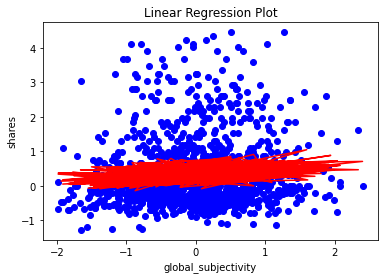

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_test3['global_subjectivity'], y_test3, color='blue')
plt.plot(X_test3['global_subjectivity'], y_pred, color='red')
plt.xlabel('global_subjectivity')
plt.ylabel('shares')
plt.title('Linear Regression Plot')
plt.show()

In [16]:
model_df2=pd.concat([model_df2, pd.DataFrame(model_df['shares_cat'])], axis=1)

In [18]:
model_df2.to_csv("SVM.csv")

In [19]:
model_df2=pd.read_csv("SVM.csv")

In [23]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(model_df2.drop(columns='shares_cat'), model_df2.shares_cat, test_size=0.3, random_state=42)

In [24]:
X_test3

n_non_stop_unique_tokens  kw_avg_min  kw_avg_max  kw_max_avg    LDA_00  \
599                   0.136579    0.393814   -0.334305    3.317320 -0.075551   
752                  -0.411889   -0.269154   -0.369956   -0.425942  1.894264   
2018                  1.356961    0.051942    0.289831   -0.165930  0.000003   
1001                  0.612101    0.697674    0.094983    0.713501  2.326265   
2517                 -0.178797   -0.067288   -0.391745   -0.208686  2.291672   
...                        ...         ...         ...         ...       ...   
4008                 -0.175739   -0.328853    0.466741    1.035713 -0.026695   
3984                  0.100972   -1.135302    1.367600   -0.323899 -0.026408   
1350                 -0.546431    0.578444    0.157808    3.903350  0.618560   
765                   0.036262    0.707414   -0.659922   -0.420511 -0.063186   
2820                 -0.298711   -0.177075   -0.295985    0.708420  0.000005   

        LDA_01  global_subjectivity  global_sentiment_polarity  \
599  -0.486483             0.550818                   0.370864   
752   0.269561            -0.265152                  -0.710171   
2018  0.269639            -0.531056                  -0.042479   
1001  0.648024             0.240755                   0.870900   
2517  0.648174             1.324982                   0.103936   
...        ...                  ...                        ...   
4008 -0.000245            -1.009620                  -1.573775   
3984 -0.000409            -0.800179                   0.896453   
1350 -0.350838            -0.918586                   0.081176   
765  -0.351605             0.583212                   0.856122   
2820  0.269757             0.805634                  -0.835829   

      global_rate_positive_words  global_rate_negative_words  
599                     0.800086                   -0.384835  
752                    -0.108986                    0.340126  
2018                   -0.924857                   -0.029099  
1001                    0.754550                   -0.292244  
2517                   -0.335762                   -0.114990  
...                          ...                         ...  
4008                   -1.399858                    0.184496  
3984                   -0.205261                   -1.127963  
1350                    0.117691                   -0.177459  
765                     0.704320                   -0.050682  
2820                   -0.295002                    0.877084  

[1227 rows x 10 columns]

In [25]:
y_test3

599     Moderate Engagement
752          Low Engagement
2018         Low Engagement
1001                  Viral
2517    Moderate Engagement
               ...         
4008         Low Engagement
3984    Moderate Engagement
1350         Low Engagement
765     Moderate Engagement
2820    Moderate Engagement
Name: shares_cat, Length: 1227, dtype: category
Categories (4, object): ['Low Engagement' < 'Moderate Engagement' < 'High Engagement' < 'Viral']

In [143]:
MyDT_R3=DecisionTreeClassifier(criterion='log_loss', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=2, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)


MyDT_R3.fit(X_train3, y_train3)

DecisionTreeClassifier(criterion='log_loss', max_depth=2)

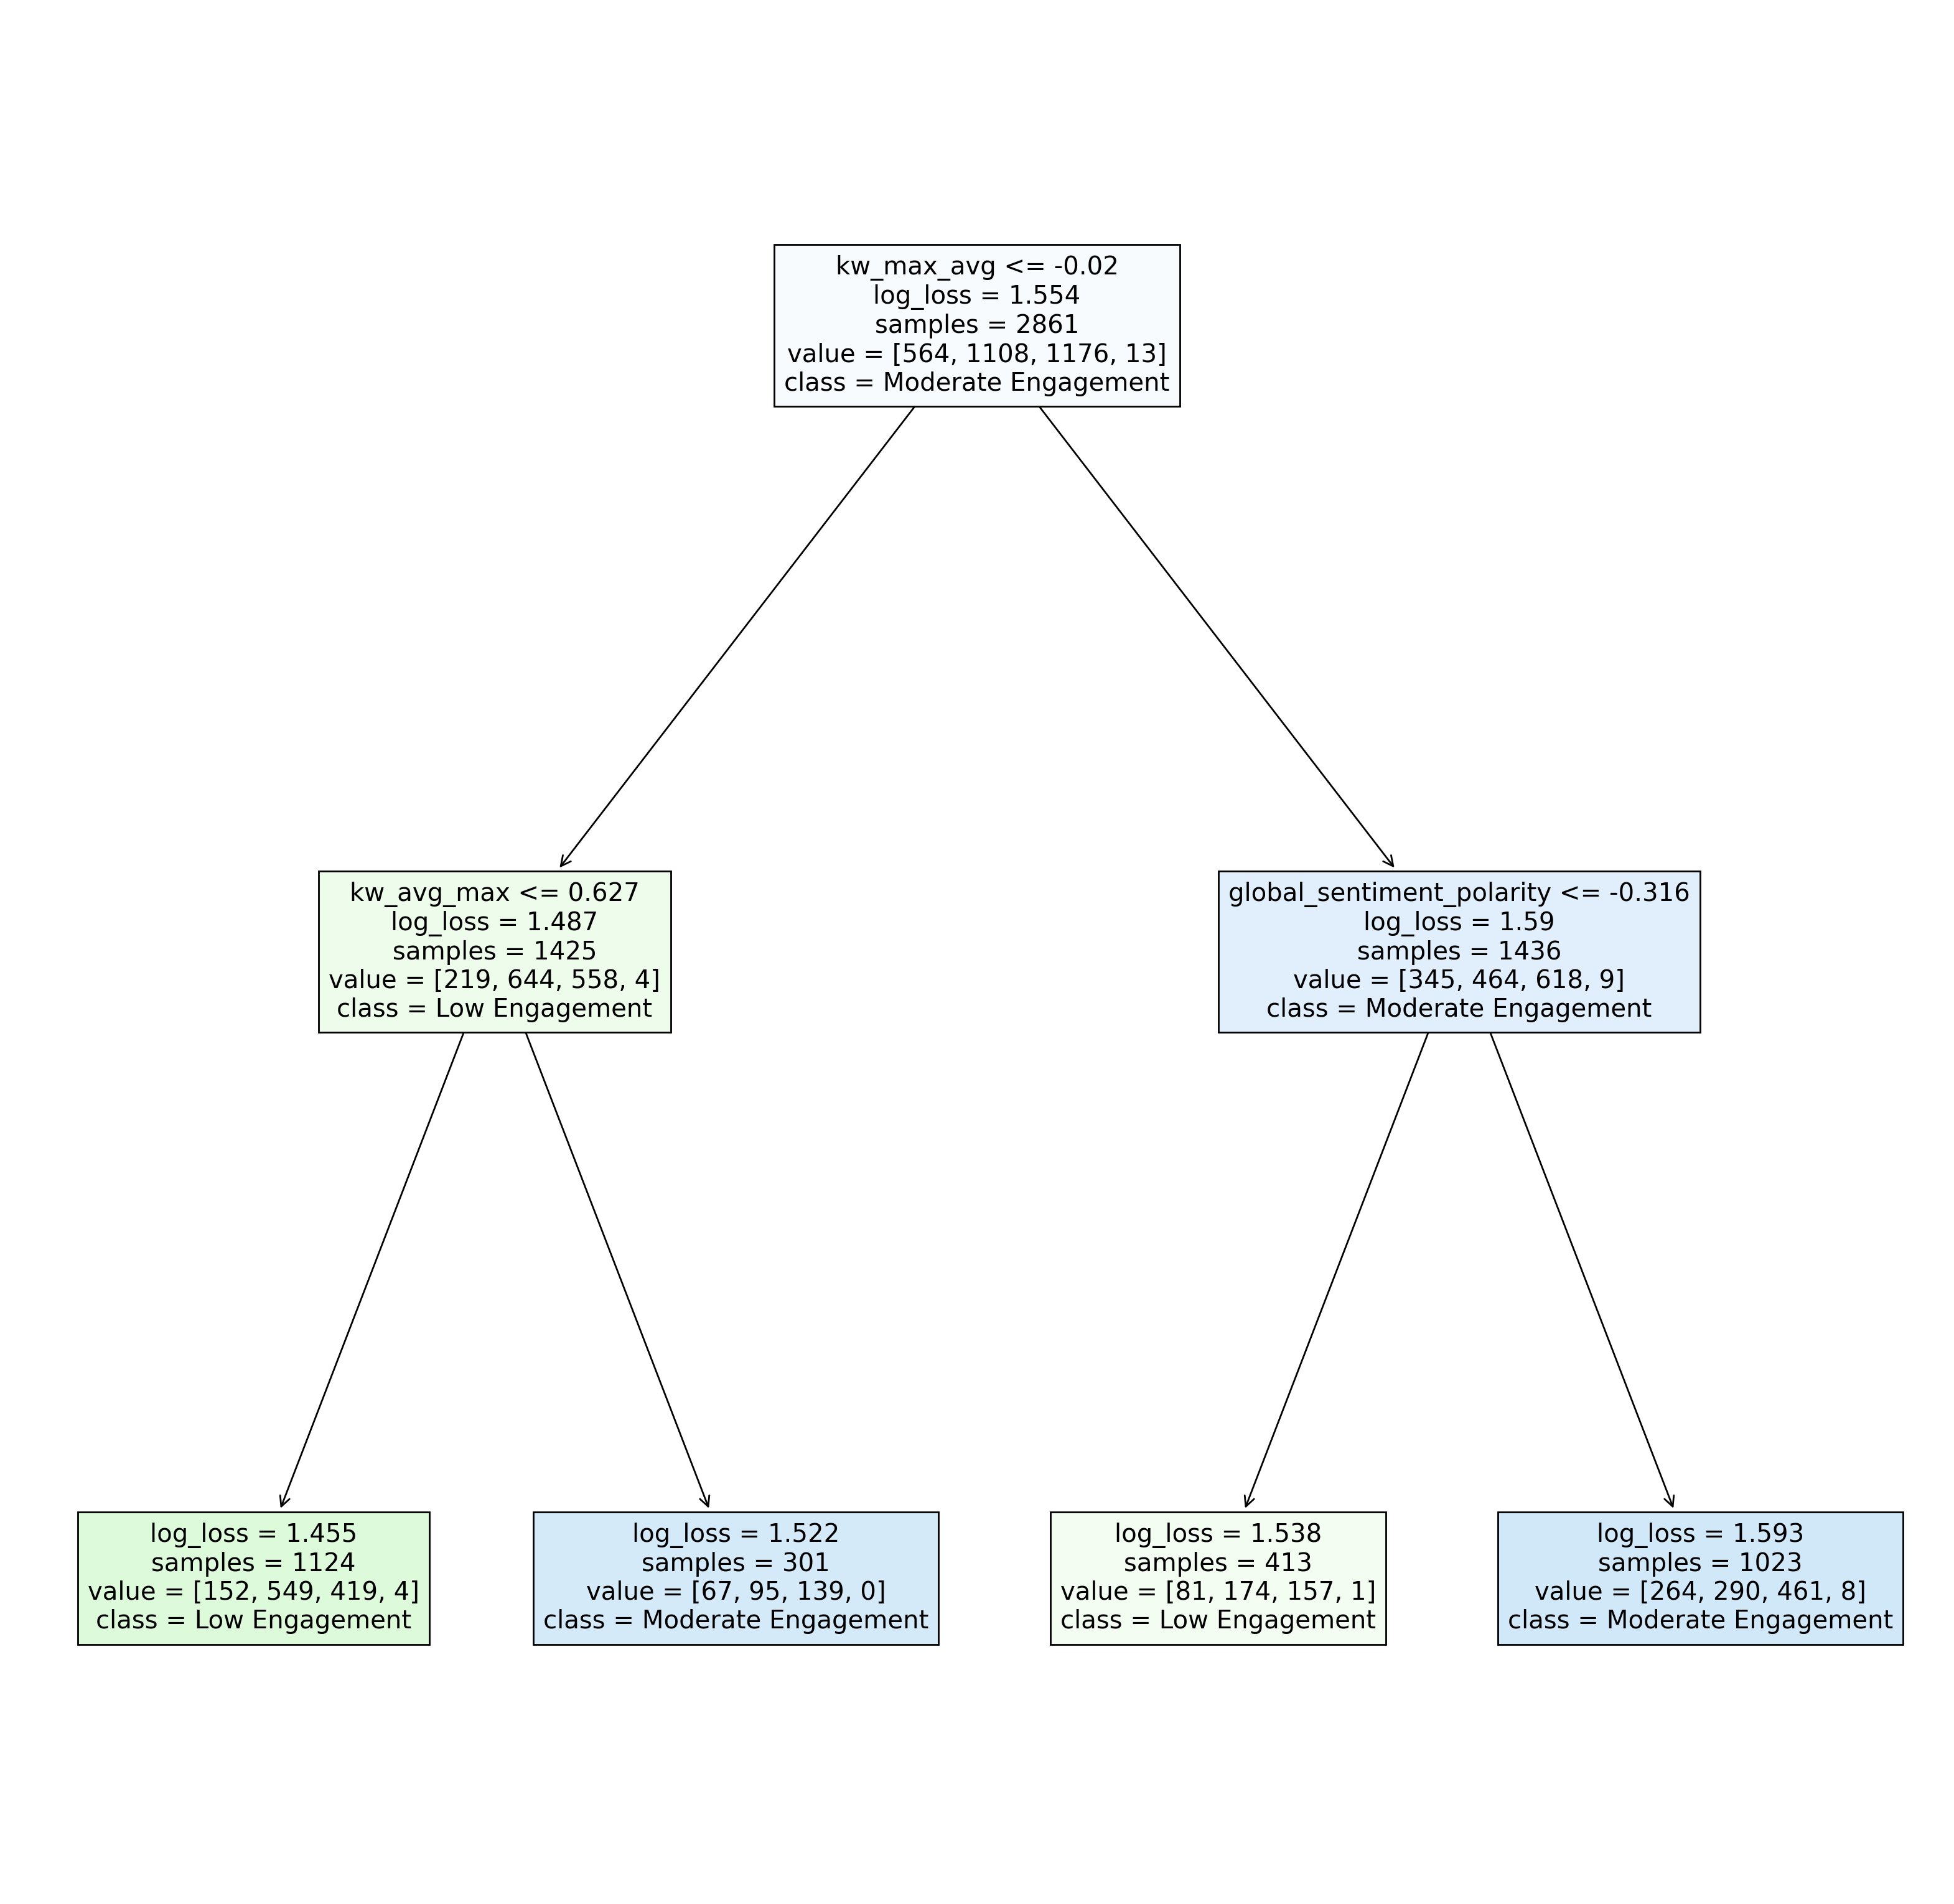

In [144]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20), dpi=200)
plot_tree(MyDT_R3, filled=True, feature_names=X_train3.columns, class_names=model_df2['shares_cat'].unique().astype(str), ax=ax)
plt.show()

In [145]:
y_pred3=MyDT_R3.predict(X_test3)

In [146]:
ac3 = metrics.accuracy_score(y_test3, y_pred3)
cm3 = metrics.confusion_matrix(y_test3, y_pred3)

In [147]:
print(ac3)

0.4229828850855746


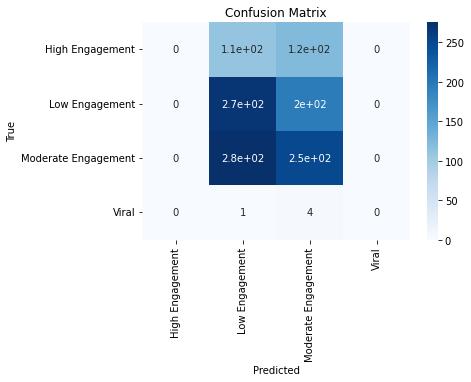

In [148]:
class_names=model_df2['shares_cat'].unique().astype(str)
heatmap=sns.heatmap(cm3, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
model_df.to_csv("DT_Train.csv")

In [22]:
model_df.head()

n_non_stop_unique_tokens  kw_avg_min     kw_avg_max   kw_max_avg    LDA_00  \
0                  0.838384  266.200000  141071.428571  3289.644151  0.028602   
1                  0.762821  175.285714  209337.500000  3451.128205  0.152864   
2                  0.785124  361.875000  195390.000000  6965.260274  0.233123   
3                  0.771242  401.857143  179514.285714  5070.818182  0.028573   
4                  0.797980  170.333333  239975.000000  3803.163592  0.053405   

     LDA_01  global_subjectivity  global_sentiment_polarity  \
0  0.028608             0.545455                   0.166970   
1  0.314646             0.482493                   0.070798   
2  0.020154             0.611765                   0.263904   
3  0.028916             0.331564                   0.096353   
4  0.050480             0.351632                   0.074592   

   global_rate_positive_words  global_rate_negative_words           shares_cat  
0                    0.036145                    0.000000      High Engagement  
1                    0.032653                    0.012245       Low Engagement  
2                    0.056410                    0.000000       Low Engagement  
3                    0.044898                    0.016327  Moderate Engagement  
4                    0.028090                    0.022472  Moderate Engagement

In [24]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns='shares_cat'), model_df.shares_cat, test_size=0.3, random_state=42)

In [25]:
X_train

n_non_stop_unique_tokens  kw_avg_min     kw_avg_max   kw_max_avg  \
3075                  0.569264  137.000000  401450.000000  3483.538140   
1078                  0.741379  178.375000  166462.500000  3505.533456   
1684                  0.649402  293.888889  133230.000000  5955.555556   
1569                  0.634361  226.142857  183275.000000  3661.988506   
2091                  0.587922  187.000000  311700.000000  4630.789836   
...                        ...         ...            ...          ...   
1130                  0.708134  157.875000  168622.222222  5809.250000   
1294                  0.655660  217.222222  223333.333333  8794.683333   
860                   0.692935  143.000000  168716.666667  3286.669443   
3507                  0.736111  110.285714  233642.857143  4299.892612   
3174                  0.771654  129.500000  229175.000000  3951.444444   

        LDA_00    LDA_01  global_subjectivity  global_sentiment_polarity  \
3075  0.050003  0.050003             0.495779                   0.006670   
1078  0.150795  0.025001             0.472024                   0.233482   
1684  0.020147  0.020243             0.411983                   0.112082   
1569  0.025039  0.025002             0.415773                   0.154390   
2091  0.020853  0.020010             0.413697                   0.158793   
...        ...       ...                  ...                        ...   
1130  0.023044  0.163114             0.423810                   0.123529   
1294  0.022252  0.022427             0.419545                   0.140718   
860   0.033356  0.033358             0.470807                   0.136366   
3507  0.028833  0.028834             0.262963                   0.111111   
3174  0.025000  0.025000             0.349641                   0.071411   

      global_rate_positive_words  global_rate_negative_words  
3075                    0.029563                    0.025707  
1078                    0.036066                    0.009836  
1684                    0.036675                    0.013447  
1569                    0.032110                    0.011468  
2091                    0.047831                    0.010011  
...                          ...                         ...  
1130                    0.035088                    0.015038  
1294                    0.039234                    0.010036  
860                     0.038820                    0.020186  
3507                    0.017094                    0.008547  
3174                    0.053476                    0.021390  

[2861 rows x 10 columns]

In [26]:
X_test

n_non_stop_unique_tokens  kw_avg_min     kw_avg_max   kw_max_avg  \
599                   0.712934  252.600000  194570.000000  7669.200000   
752                   0.656997  159.000000  189983.333333  3281.271297   
2018                  0.837398  204.333333  274868.166667  3586.062823   
1001                  0.761431  295.500000  249800.000000  4616.950197   
2517                  0.680769  187.500000  187180.000000  3535.942862   
...                        ...         ...            ...          ...   
4008                  0.681081  150.571429  297628.571429  4994.652632   
3984                  0.709302   36.714286  413528.571429  3400.887791   
1350                  0.643275  278.666667  257882.777778  8356.156250   
765                   0.702703  296.875000  152677.777778  3287.637782   
2820                  0.668539  172.000000  199500.000000  4610.993506   

        LDA_00    LDA_01  global_subjectivity  global_sentiment_polarity  \
599   0.020050  0.020001             0.490718                   0.145589   
752   0.366444  0.033334             0.411752                   0.040948   
2018  0.033336  0.033335             0.386019                   0.105579   
1001  0.442412  0.040008             0.460712                   0.193991   
2517  0.436329  0.040011             0.565639                   0.119751   
...        ...       ...                  ...                        ...   
4008  0.028642  0.028576             0.339706                  -0.042647   
3984  0.028692  0.028573             0.359975                   0.196465   
1350  0.142110  0.022393             0.348516                   0.117548   
765   0.022225  0.022379             0.493853                   0.192561   
2820  0.033337  0.033337             0.515378                   0.028784   

      global_rate_positive_words  global_rate_negative_words  
599                     0.051233                    0.011385  
752                     0.034826                    0.018905  
2018                    0.020101                    0.015075  
1001                    0.050412                    0.012346  
2517                    0.030733                    0.014184  
...                          ...                         ...  
4008                    0.011527                    0.017291  
3984                    0.033088                    0.003676  
1350                    0.038917                    0.013536  
765                     0.049505                    0.014851  
2820                    0.031469                    0.024476  

[1227 rows x 10 columns]

Index(['n_non_stop_unique_tokens', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'LDA_00', 'LDA_01', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words'],
      dtype='object')


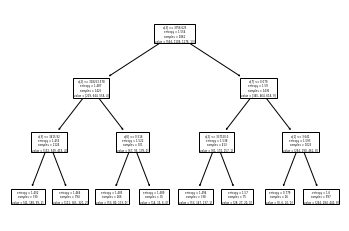

In [33]:
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)


MyDT_R.fit(X_train, y_train)

tree.plot_tree(MyDT_R)

feature_namesR=X_train.columns
print(feature_namesR)

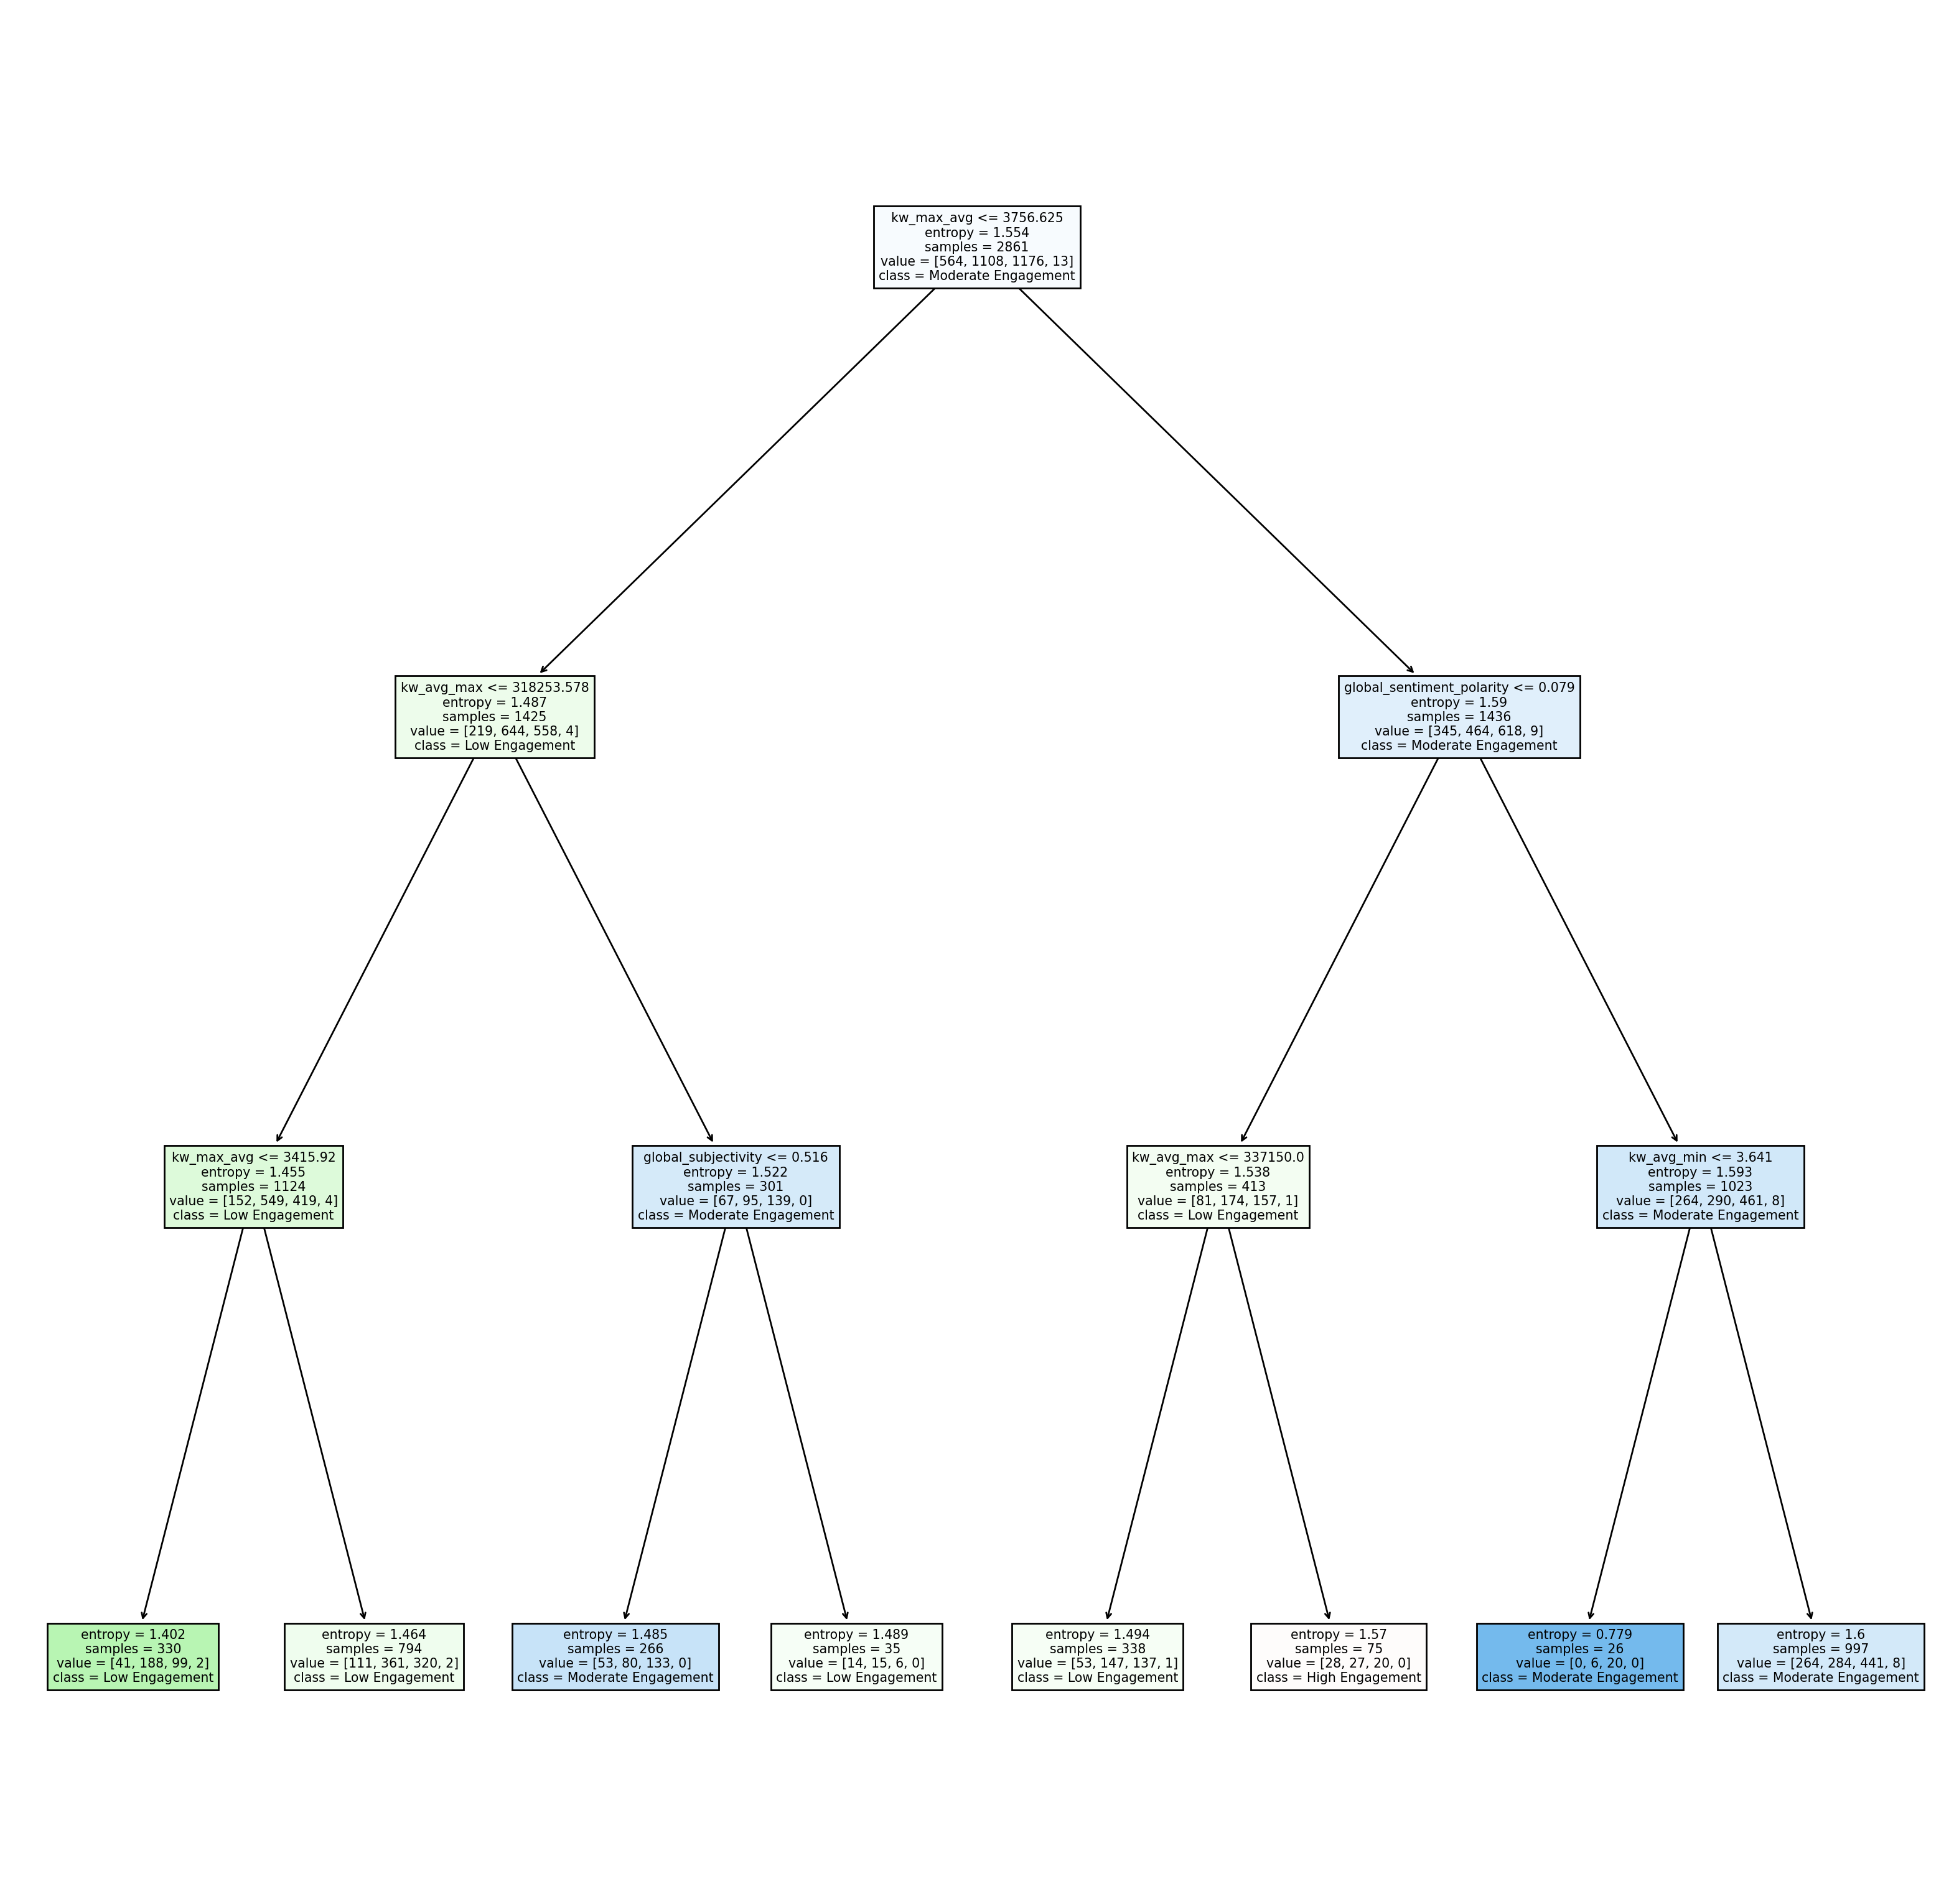

In [34]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20), dpi=200)
plot_tree(MyDT_R, filled=True, feature_names=X_train.columns, class_names=df['shares_cat'].unique().astype(str), ax=ax)
plt.show()

In [35]:
y_pred=MyDT_R.predict(X_test)

In [36]:
ac1 = metrics.accuracy_score(y_test, y_pred)
cm1 = metrics.confusion_matrix(y_test, y_pred)

In [37]:
print(ac1)

0.4132029339853301


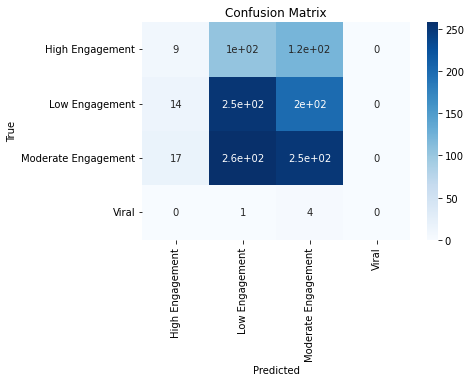

In [92]:
class_names=df['shares_cat'].unique().astype(str)
heatmap=sns.heatmap(cm1, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
df2=pd.read_csv("cat.csv")

In [40]:
df2.drop(columns="Unnamed: 0", inplace=True)

In [41]:
df2.head()

weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
0                1.0                 0.0                   0.0   
1                1.0                 0.0                   0.0   
2                1.0                 0.0                   0.0   
3                1.0                 0.0                   0.0   
4                1.0                 0.0                   0.0   

   weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
0                  0.0                0.0                  0.0   
1                  0.0                0.0                  0.0   
2                  0.0                0.0                  0.0   
3                  0.0                0.0                  0.0   
4                  0.0                0.0                  0.0   

   weekday_is_sunday  is_weekend  data_channel_is_lifestyle  \
0                0.0         0.0                        0.0   
1                0.0         0.0                        0.0   
2                0.0         0.0                        0.0   
3                0.0         0.0                        0.0   
4                0.0         0.0                        0.0   

   data_channel_is_entertainment  ...  n_unique_tokens  kw_avg_min  \
0                            1.0  ...         0.663594         0.0   
1                            0.0  ...         0.604743         0.0   
2                            0.0  ...         0.575130         0.0   
3                            1.0  ...         0.503788         0.0   
4                            0.0  ...         0.415646         0.0   

   kw_avg_avg  self_reference_avg_sharess    LDA_00    LDA_02  \
0         0.0                  496.000000  0.500331  0.040005   
1         0.0                    0.000000  0.799756  0.050096   
2         0.0                  918.000000  0.217792  0.033351   
3         0.0                    0.000000  0.028573  0.494651   
4         0.0                 3151.157895  0.028633  0.028575   

   global_sentiment_polarity  global_rate_positive_words  \
0                   0.092562                    0.045662   
1                   0.148948                    0.043137   
2                   0.323333                    0.056872   
3                   0.100705                    0.041431   
4                   0.281003                    0.074627   

   avg_positive_polarity  shares  
0               0.378636     593  
1               0.286915     711  
2               0.495833    1500  
3               0.385965    1200  
4               0.411127     505  

[5 rows x 25 columns]

In [42]:
bins_shares = [0, 1000, 2000, 5000, np.inf]
# Discretize the shares column and create a new categorical column
df2['shares_cat'] = pd.cut(df2['shares'], bins=bins_shares, labels=['Low Engagement', 'Moderate Engagement', 'High Engagement', 'Viral'])

In [43]:
df2.drop(columns=['shares'], inplace=True)

In [44]:
df2.head()

weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
0                1.0                 0.0                   0.0   
1                1.0                 0.0                   0.0   
2                1.0                 0.0                   0.0   
3                1.0                 0.0                   0.0   
4                1.0                 0.0                   0.0   

   weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
0                  0.0                0.0                  0.0   
1                  0.0                0.0                  0.0   
2                  0.0                0.0                  0.0   
3                  0.0                0.0                  0.0   
4                  0.0                0.0                  0.0   

   weekday_is_sunday  is_weekend  data_channel_is_lifestyle  \
0                0.0         0.0                        0.0   
1                0.0         0.0                        0.0   
2                0.0         0.0                        0.0   
3                0.0         0.0                        0.0   
4                0.0         0.0                        0.0   

   data_channel_is_entertainment  ...  n_unique_tokens  kw_avg_min  \
0                            1.0  ...         0.663594         0.0   
1                            0.0  ...         0.604743         0.0   
2                            0.0  ...         0.575130         0.0   
3                            1.0  ...         0.503788         0.0   
4                            0.0  ...         0.415646         0.0   

   kw_avg_avg  self_reference_avg_sharess    LDA_00    LDA_02  \
0         0.0                  496.000000  0.500331  0.040005   
1         0.0                    0.000000  0.799756  0.050096   
2         0.0                  918.000000  0.217792  0.033351   
3         0.0                    0.000000  0.028573  0.494651   
4         0.0                 3151.157895  0.028633  0.028575   

   global_sentiment_polarity  global_rate_positive_words  \
0                   0.092562                    0.045662   
1                   0.148948                    0.043137   
2                   0.323333                    0.056872   
3                   0.100705                    0.041431   
4                   0.281003                    0.074627   

   avg_positive_polarity           shares_cat  
0               0.378636       Low Engagement  
1               0.286915       Low Engagement  
2               0.495833  Moderate Engagement  
3               0.385965  Moderate Engagement  
4               0.411127       Low Engagement  

[5 rows x 25 columns]

In [45]:
df2=df2.sample(5000, random_state=42)

In [46]:
df2

weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
12472                0.0                 0.0                   0.0   
22034                0.0                 0.0                   0.0   
23435                0.0                 0.0                   0.0   
22148                0.0                 1.0                   0.0   
10299                0.0                 1.0                   0.0   
...                  ...                 ...                   ...   
1347                 0.0                 0.0                   1.0   
34822                0.0                 1.0                   0.0   
1981                 0.0                 0.0                   0.0   
7515                 0.0                 0.0                   1.0   
8966                 0.0                 0.0                   1.0   

       weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
12472                  1.0                0.0                  0.0   
22034                  0.0                1.0                  0.0   
23435                  1.0                0.0                  0.0   
22148                  0.0                0.0                  0.0   
10299                  0.0                0.0                  0.0   
...                    ...                ...                  ...   
1347                   0.0                0.0                  0.0   
34822                  0.0                0.0                  0.0   
1981                   0.0                0.0                  0.0   
7515                   0.0                0.0                  0.0   
8966                   0.0                0.0                  0.0   

       weekday_is_sunday  is_weekend  data_channel_is_lifestyle  \
12472                0.0         0.0                        0.0   
22034                0.0         0.0                        0.0   
23435                0.0         0.0                        0.0   
22148                0.0         0.0                        0.0   
10299                0.0         0.0                        0.0   
...                  ...         ...                        ...   
1347                 0.0         0.0                        0.0   
34822                0.0         0.0                        0.0   
1981                 1.0         1.0                        0.0   
7515                 0.0         0.0                        0.0   
8966                 0.0         0.0                        0.0   

       data_channel_is_entertainment  ...  n_unique_tokens  kw_avg_min  \
12472                            0.0  ...         0.709677  223.200000   
22034                            0.0  ...         0.673913  299.800000   
23435                            0.0  ...         0.496644  124.800000   
22148                            0.0  ...         0.412526  285.333333   
10299                            1.0  ...         0.440903  122.400000   
...                              ...  ...              ...         ...   
1347                             0.0  ...         0.451202  722.875000   
34822                            0.0  ...         0.545455  170.666667   
1981                             0.0  ...         0.689922  374.333333   
7515                             0.0  ...         0.600671  161.000000   
8966                             0.0  ...         0.595541  193.000000   

        kw_avg_avg  self_reference_avg_sharess    LDA_00    LDA_02  \
12472  2687.604412                 6500.000000  0.564811  0.040082   
22034  3210.085517                 3600.000000  0.143208  0.125632   
23435  3287.599989                 1694.333333  0.040000  0.839997   
22148  1684.374908                 1133.333333  0.020016  0.579103   
10299  4139.583593                 5475.000000  0.020016  0.020001   
...            ...                         ...       ...       ...   
1347   2233.132312                 1800.000000  0.910807  0.022229   
34822  3238.407881                 5000.000000  0.022229  0.185652   
1

In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(columns='shares_cat'), df2.shares_cat, test_size=0.3, random_state=42)

In [53]:
MyDT_R2=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)


MyDT_R2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=3)

In [54]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 30), dpi=500)
plot_tree(MyDT_R2, filled=True, feature_names=X_train2.columns, class_names=df2['shares_cat'].unique().astype(str), ax=ax)
plt.show()

In [55]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 30), dpi=500)
plot_tree(MyDT_R2, filled=True, feature_names=X_train2.columns, class_names=df2['shares_cat'].unique().astype(str), ax=ax)
plt.show()

In [51]:
y_pred2=MyDT_R2.predict(X_test2)

In [57]:
ac2 = metrics.accuracy_score(y_test2, y_pred2)
cm2 = metrics.confusion_matrix(y_test2, y_pred2)
print(ac2)

0.4053333333333333


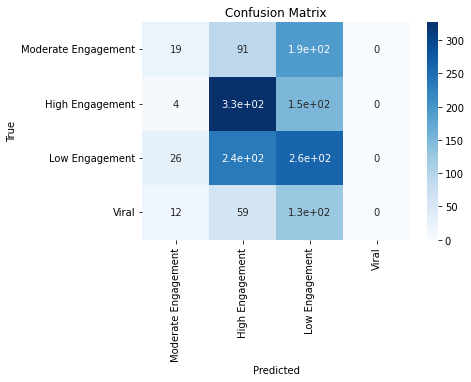

In [132]:
class_names=df2['shares_cat'].unique().astype(str)
heatmap=sns.heatmap(cm2, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
df4 = pd.read_csv('Exam1_DT_NB.csv')

In [43]:
df4=df4.sample(1000, random_state=42)

In [44]:
df4.drop(columns=["Unnamed: 0",'category','Day'], inplace=True)

In [45]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4.drop(columns='shares_cat'), df4.shares_cat, test_size=0.3, random_state=42)

In [91]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=100 )

# Train the model on the training data
clf.fit(X_train4, y_train4)

y_pred3=clf.predict(X_test4)
ac3 = metrics.accuracy_score(y_test4, y_pred3)

In [92]:
y_pred4=clf.predict(X_test4)

In [93]:
ac4 = metrics.accuracy_score(y_test4, y_pred4)
cm4 = metrics.confusion_matrix(y_test4, y_pred4)
print(ac4)

0.57


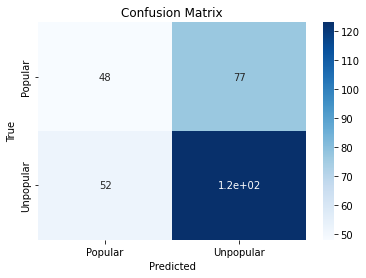

In [94]:
class_names=df4['shares_cat'].unique().astype(str)
heatmap=sns.heatmap(cm4, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()